In [1]:
from landlab.io import read_esri_ascii
from landlab import imshow_grid,RasterModelGrid
from landlab.components import Space,FlowAccumulator,FlowDirAccPf, DepressionFinderAndRouter
import numpy as np
from matplotlib import pyplot as plt

Read any masked DEM

/Users/beca4397/Google_Drive/landlab/landlab/plot/imshow.py:302: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("pink").copy()
  cmap.set_bad(color=color_for_closed)
/Users/beca4397/Google_Drive/landlab/landlab/plot/imshow.py:342: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(norm=norm, shrink=shrink)


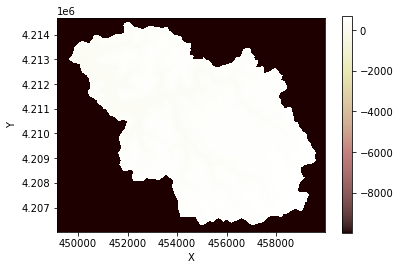

In [2]:
mg, z = read_esri_ascii('/Users/beca4397/Data/GIS/north_post10m.asc', name='topographic__elevation')  
imshow_grid(mg,'topographic__elevation')

In [3]:
# min_z = np.min(z[np.where(z > 0)])
# max_z = np.max(z[np.where(z > 0)])
# #help(imshow_grid)

# imshow_grid(mg, 'topographic__elevation', limits=(min_z, max_z))

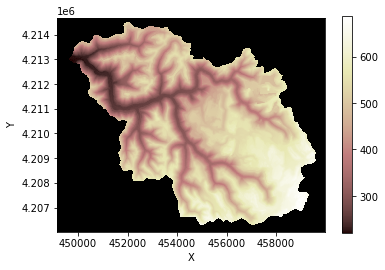

In [4]:
mg.set_nodata_nodes_to_closed(z,-9999)
imshow_grid(mg,'topographic__elevation')

In [5]:
outlet_id=mg.set_watershed_boundary_condition(z, nodata_value=-9999.0, return_outlet_id=True,
    remove_disconnected=False, adjacency_method='D8',)
print(outlet_id)
# imshow_grid(mg, mg.status_at_node)

[755982]


Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


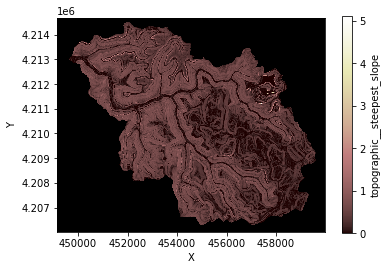

In [6]:
fr = FlowDirAccPf(mg,flow_metric='D8')
fr.run_one_step()

# fr = FlowAccumulator(mg, flow_director='D8')
# df = DepressionFinderAndRouter(mg)
# fr.run_one_step()
# df.map_depressions()

imshow_grid(mg,'topographic__steepest_slope', colorbar_label='topographic__steepest_slope')

In [7]:
print(np.unique(mg.at_node["topographic__steepest_slope"]))


[  0.00000000e+00   1.00000000e-05   2.00000000e-05 ...,   4.85307000e+00
   4.97772000e+00   5.11324000e+00]


In [8]:
_ = mg.add_zeros('soil__depth', at='node', dtype=float)
mg.at_node['soil__depth'] += 0.5
mg.at_node['topographic__elevation'] += mg.at_node['soil__depth']

In [9]:
space_dt = 10

ha = Space(mg,
           K_sed=0.00001,
           K_br=0.00000000001,
           F_f=0.5,
           phi=0.1,
           H_star=1.,
           v_s=0.001,
           m_sp=0.5,
           n_sp = 1.0,
           sp_crit_sed=0,
           sp_crit_br=0)



In [10]:
z_ori = np.array(z)
for i in range(10):
    print(i)
    fr.run_one_step()
    ha.run_one_step(dt=space_dt)
    

0
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
1
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
2
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
3
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
4
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
5
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
6
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
7
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
8
Warning! No geotransform defined. Choosing a s

/Users/beca4397/Google_Drive/landlab/landlab/plot/imshow.py:302: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  cmap.set_bad(color=color_for_closed)
/Users/beca4397/Google_Drive/landlab/landlab/plot/imshow.py:302: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("terrain").copy()
  cmap.set_bad(color=color_for_closed)


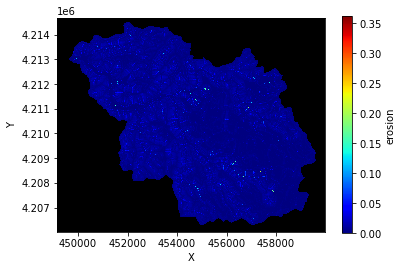

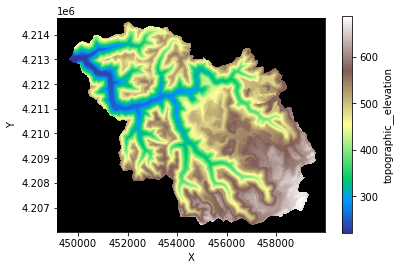

In [11]:
imshow_grid(mg,(z_ori-z),colorbar_label='erosion',
            cmap='jet')
plt.figure()
imshow_grid(mg,'topographic__elevation',
            colorbar_label='topographic__elevation',
            cmap='terrain'
           )
